# Лабораторная работа №6# 

## Вариант №19

### Найти точку максимума функции методом сопряженых градиентов. 
$$f(x, y) = 4-2(x-3)^2-(y-2)^2, [x0=1, y0=-3]$$ 
### В окрестности точки минимума оценить овражность,построить линии уровня и траекторию поиска. Исследовать условия сходимости.
## Теоретическая справка:
### Метод сопряженных градиентов формирует направления поиска, в большей мере соответствующие геометрии минимизируемой функции.Стратегия метода Флетчера-Ривса состоит в построении последовательности точек:
$${x^k},   k=0, 1, 2, ...$$
### таких, что 
$$f(x^{k+1}) < f(x^k),   k=0, 1, 2, ... $$
### Точки последовательности ${x^k}$ вычисляются по правилу: 
$$x^{k+1}=x^k-t_kd_k,   k = 0, 1, 2,… $$
$$d_k = ▽f(x^k) + b_{k-1}▽f(x^{k-1})$$
$$b_{k-1}={||▽f(x^k)||^2}/{||▽f(x^{k-1}||^2}$$
### Величина шага выбирается из условия минимума функции $f(х)$ по $t$ в направлении движения, т. е. в результате решения задачи одномерной минимизации: 
$$f(x^k-t_kd_k) → min (t_k>0)$$
### В случае квадратичной функции $f(x)= (х, Нх) + (b, х) + а$ направления $d_k, d_{k-1}$ будут H-сопряженными, т.е. $(d_k, Hd_{k-1})=0$
### При этом в точках последовательности ${x^k}$ градиенты функции $f(x)$ взаимно перпендикулярны, т.е.
$$(▽f(x^{k+1}),▽f(x^k))=0, k =0, 1, 2…$$

In [74]:
from numpy import *
from pylab import*
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline 


### Построение 3D графика функции

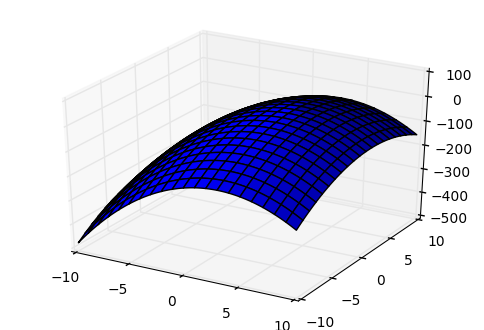

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
x,y = np.meshgrid(x,y)
F=4-2*(x-3)**2-(y-2)**2
surf = ax.plot_surface(x, y, F) 
plt.show()


### Метод сопряженых градиентов (Метод Флетчера - Ривса)

In [65]:
x0=1
y0=-3
x=x0
y=y0
def G(x,y):
    return (4-2*(x-3)**2-(y-2)**2)
def Gx(x):
    return (4*(x-3))
def Gy(y):
    return (2*(y-2))
W=Gx(x)
V=Gy(y)
k=0
while (((W)**2+(V)**2)**(1/2))>0.001:
    tx=(3-x0)/W
    ty=(2-y0)/V
    x=x0+tx*Gx(x0)
    y=y0+ty*Gy(y0)
    W=Gx(x)
    V=Gy(y)
    k=k+1
print(x,y,k)    
        

3.0 2.0 1


### Постоение линий уровня и траектории поиска

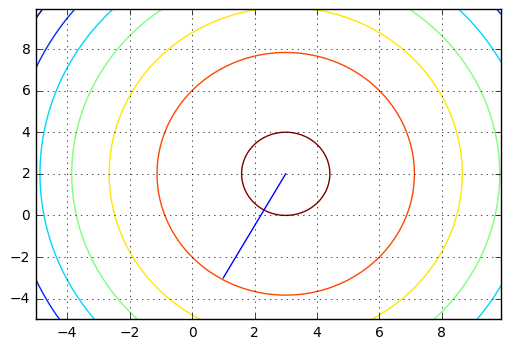

In [70]:
def f(xh,xj):
    return (4-2*(xh-3)**2-(xj-2)**2)
A=np.array([1,-3,3,2]).reshape((2,2))
x = np.arange(-5, 10, 0.1)
y = np.arange(-5, 10, 0.1)
xg,yg = np.meshgrid(x,y)
z=f(xg,yg)
pylab.contour(xg,yg,z)
pylab.plot(A[:,0] ,A[:,1])
pylab.grid()
pylab.show()

### Оценка овражности с помощью матрицы Гессе и ее собственных значений

In [73]:
def f(x):
    return (4-2*(x-3)**2-(y-2)**2)
def grad(x):
    return np.array([(4*(x-3)), (2*(y-2))])
def gess(x):
    return np.array([4,0,0,2]).reshape((2,2))
x=linspace(0,1,1)
g=gess(x)
linalg.eig(g)

(array([ 4.,  2.]), array([[ 1.,  0.],
        [ 0.,  1.]]))

### Оценку сходимости можно произвести с помощью:
### Теорема 1. Если квадратичная функция $f(x) = (х, Нх) + (b, х) + а$ с неотрицательно определенной матрицей $Н$ достигает своего минимального значения на $R^n$, то метод Флетчера-Ривса обеспечивает отыскание точки минимума не более чем за $n$ шагов. 
### Вывод: проделав лабораторную работу мы решили задачу минимизации данной функции предложеным методом сопряженых градиентов (Метод Флетчера - Ривса). Нашли точку максимума функции $f(x,y)=4−2(x−3)^2−(y−2)^2,max=[x=3,y=2]$. Овражность в данной точке равна $2$.

 

## Работу выполнил студент 431гр. Широков Алексей
